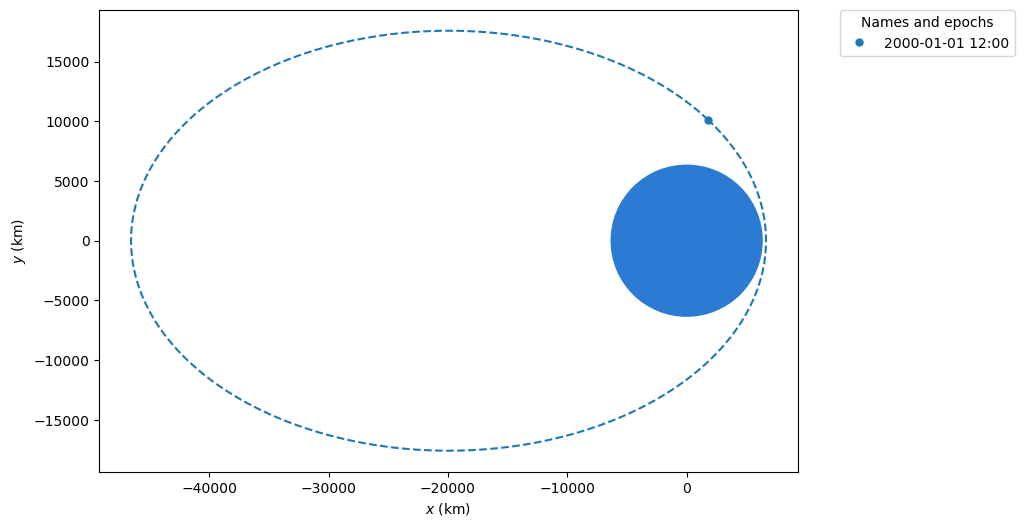

In [1]:
from poliastro.examples import molniya
molniya.plot()

In [8]:
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit

a = 26552 << u.km
ecc = 0.7099 << u.one
inc = 63.45 << u.deg
raan = 250.7 << u.deg
argp = 282.7 << u.deg
nu = 0 << u.deg

orb = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu)

orb.plot()

AttributeError: type object 'Orbit' has no attribute 'from_molniya'

In [6]:
obj_30m = orb.propagate(30 << u.min)

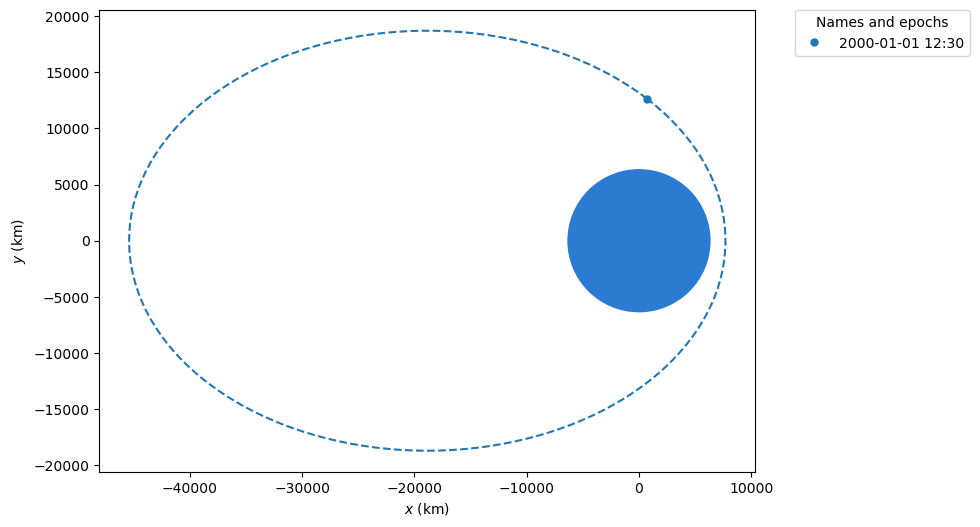

In [7]:
obj_30m.plot()

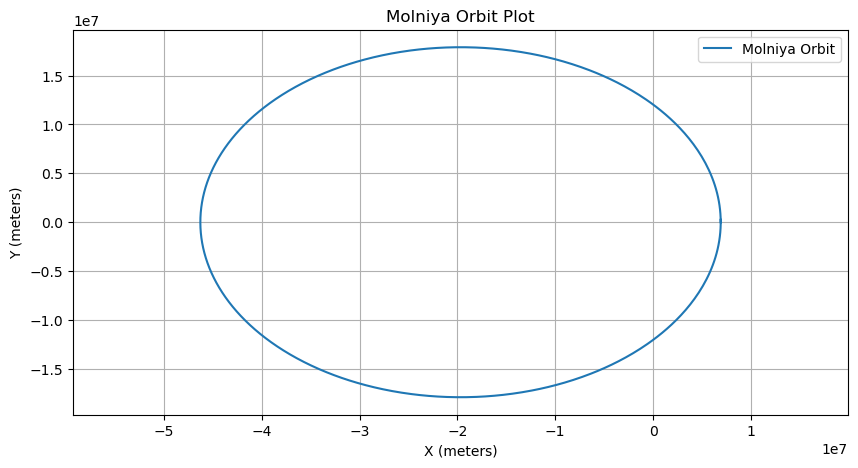

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M_earth = 5.972e24  # Mass of Earth, kg
mu = G * M_earth  # Gravitational parameter of Earth, m^3 s^-2

# Keplerian elements for a typical Molniya orbit
a = 26600e3  # Semi-major axis, meters
e = 0.74  # Eccentricity
i = np.deg2rad(63.4)  # Inclination, radians
Omega = np.deg2rad(0)  # Longitude of ascending node, radians
omega = np.deg2rad(270)  # Argument of periapsis, radians
T = 0  # Epoch
n = np.sqrt(mu / a**3)  # Mean motion, rad/s

# Time span and points
t_eval = np.linspace(0, 12 * 3600, 1000)  # 12 hours

# Function to solve Kepler's equation using Newton-Raphson
def solve_keplers_equation(M, e):
    E = M  # Initial guess
    for _ in range(100):  # Iterate to solve
        E_next = E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        if np.abs(E_next - E) < 1e-10:
            break
        E = E_next
    return E

# Function to compute the position in the orbital plane
def orbital_position(t, e, a):
    M = n * t
    E = solve_keplers_equation(M, e)
    nu = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2))
    r = a * (1 - e * np.cos(E))
    x = r * np.cos(nu)
    y = r * np.sin(nu)
    return x, y

# Calculate positions
positions = np.array([orbital_position(t, e, a) for t in t_eval])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(positions[:, 0], positions[:, 1], label='Molniya Orbit')
plt.title('Molniya Orbit Plot')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
